# HIV Testing Intervention

Tests and code for the creation of a new HIV testing intervention. 

In [1]:
import matplotlib.pyplot as plt

import stisim as ss

STIsim 0.0.8 (2023-10-04) — © 2023 by IDM


## Runing an basic simulation

In [2]:
# Network
ppl = ss.People( 10_000 )
ppl.networks = ss.ndict( ss.simple_sexual(), ss.maternal() )


# HIV settings and interventions
hiv_params = { 'beta'      : { 'simple_sexual': [ 0.0008, 0.0004], 
                               'maternal'     : [ 0.2   , 0     ]
                              },
               'initial' : 50   # Is this working with init_states?
              }
hiv = ss.HIV( pars=hiv_params )

hiv_simple_diagnostic = ss.hiv.SimpleDiagnosticTest()


# Simulation parameters
sim_params = { 'start': 1985,
               'end'  : 2050
              }


# Create and run simulation
sim = ss.Sim( pars          = sim_params,
              people        = ppl, 
              demographics  = [ ss.Pregnancy() ],   # Isn't people also demographics?
              diseases      = [ hiv, ss.Gonorrhea() ],
              interventions = [ hiv_simple_diagnostic ]
             )
sim.initialize()
sim.run()

... creating SimpleDiagnosticTest intervention
Initializing sim (warning: not resetting sim.people) with 10000 agents
... initializing SimpleDiagnosticTest: 
  Running 1985.0 ( 0/66) (0.00 s)  ———————————————————— 2%
... applying intervention in step  0 / 66
  Running 1995.0 (10/66) (1.51 s)  •••————————————————— 17%
  Running 2005.0 (20/66) (1.59 s)  ••••••—————————————— 32%
  Running 2015.0 (30/66) (1.67 s)  •••••••••——————————— 47%
  Running 2025.0 (40/66) (1.76 s)  ••••••••••••———————— 62%
  Running 2035.0 (50/66) (1.85 s)  •••••••••••••••————— 77%
  Running 2045.0 (60/66) (1.97 s)  ••••••••••••••••••—— 92%


[<class 'stisim.sim.Sim'>, <class 'sciris.sc_utils.prettyobj'>, <class 'object'>]
————————————————————————————————————————————————————————————
Methods:
  finalize()          init_people()       shrink()            
  init_analyzers()    init_time_vecs()    step()              
  init_demographi...  initialize()        validate_dt()       
  init_diseases()     load()              validate_pars()     
  init_interventi...  run()               validate_post_i...  
  init_networks()     save()              
————————————————————————————————————————————————————————————
Properties:
  dt                  year                
————————————————————————————————————————————————————————————
    analyzers: objdict()
     complete: True
   connectors: None
      created: None
 demographics: #0. 'pregnancy':
               [ [...]
     diseases: #0. 'hiv':
               [<class 'stisim.hiv.HI [...]
     filename: None
  initialized: True
interventions: #0. 'simplediagnostictest':
               <stis

Text(0.5, 1.0, 'HIV: number of infections')

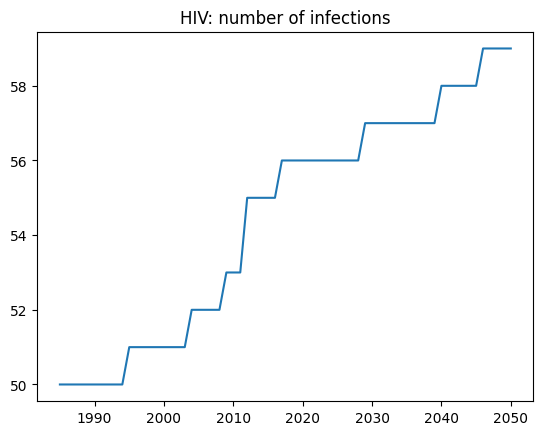

In [3]:
plt.figure()
plt.plot( sim.yearvec, sim.results.hiv.n_infected )
plt.title( 'HIV: number of infections' )

## Testing intervention

In [4]:
ppl.states.keys()

['age',
 'female',
 'debut',
 'alive',
 'ti_dead',
 'scale',
 'hiv.rel_sus',
 'hiv.rel_sev',
 'hiv.rel_trans',
 'hiv.susceptible',
 'hiv.infected',
 'hiv.ti_infected',
 'hiv.on_art',
 'hiv.cd4',
 'hiv.diagnosed',
 'hiv.ti_diagnosed',
 'gonorrhea.rel_sus',
 'gonorrhea.rel_sev',
 'gonorrhea.rel_trans',
 'gonorrhea.susceptible',
 'gonorrhea.infected',
 'gonorrhea.ti_infected',
 'gonorrhea.ti_recovered',
 'gonorrhea.ti_dead']

In [5]:
sim.results.keys()

['n_alive', 'new_deaths', 'pregnancy', 'hiv', 'gonorrhea']

In [6]:
sim.results.hiv

#0. 'n_susceptible':
Result(hiv.n_susceptible):
array([10088, 10249, 10393, 10560, 10723, 10908, 11053, 11212, 11390,
        11564, 11726, 11910, 12089, 12279, 12485, 12687, 12901, 13094,
        13296, 13504, 13718, 13944, 14130, 14334, 14557, 14780, 15025,
        15237, 15461, 15696, 15914, 16157, 16393, 16616, 16857, 17120,
        17403, 17669, 17931, 18187, 18494, 18770, 19055, 19316, 19623,
        19902, 20173, 20484, 20806, 21133, 21430, 21729, 22075, 22413,
        22730, 23073, 23412, 23773, 24083, 24433, 24793, 25195, 25574,
        25979, 26372, 26769])
————————————————————————————————————————
#1. 'n_infected':
Result(hiv.n_infected):
array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51,
        51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 55, 55, 55, 55, 55,
        56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57,
        57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 59, 59, 59,
        59, 59])
———————————————————————————————————————